In [3]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as rf
from scipy.signal import find_peaks

imports work


<!-- <span style="font-family: arial; font-size:25px; color:pink">

Open ROOT file and extract data -->

In [4]:
hit_data_1101 = rf.get_ROOT_data_zip("TB_FIRE_1101_hits.root")

# hit_data_1096 = rf.get_ROOT_data_zip("TB_FIRE_1096_hits.root")

# hit_data_1056 = rf.get_ROOT_data_zip("TB_FIRE_1056_hits.root")

# hit_data_1057 = rf.get_ROOT_data_zip("TB_FIRE_1057_hits.root")

# hit_data_1079 = rf.get_ROOT_data_zip("TB_FIRE_1079_hits.root")

TB_FIRE_1101_hits.root finished


In [48]:
np.sqrt(13**2+20**2)

np.float64(23.853720883753127)

<!-- <span style="font-family: arial; font-size:25px; color:pink">

Hit Counts and Amp in Single Planes -->

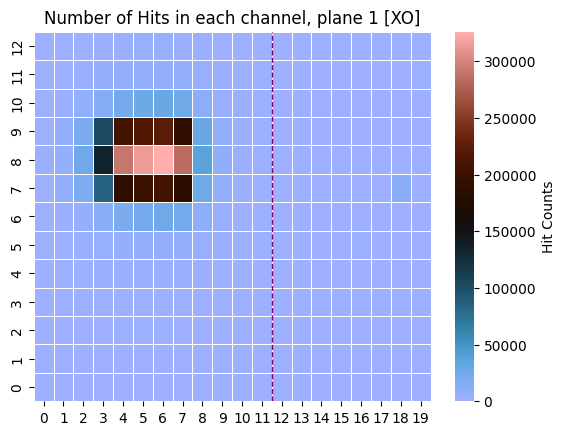

In [5]:
rf.hits_amount_colormap_single_plane(hit_data_1101, 1, cmap="berlin")

In [24]:
rf.initial_X_position_DUT(hit_data_1101, return_y = "true")
# rf.initial_X_position_DUT(hit_data_1101)

(<Array [4, 6, 3, 5, 6, 5, 7, ..., 7, 6, 7, 5, 3, 5, 7] type='1086090 * float64'>,
 <Array [8, 9, 8, 7, 8, 7, 9, ..., 10, 9, 7, 8, 7, 8] type='1086090 * float64'>)

In [26]:
a = rf.Radii_from_Initial_position(hit_data_1101)

In [47]:
a

<Array [[{plane: 0, ch: 128, ...}, ...], ...] type='1086090 * var * {plane:...'>

In [31]:
amp_radii, avg_amp, radii = rf.ak_groupby(ak.flatten(a.Distance), ak.flatten(a.amp), round = "false")

C:\Users\bents\AppData\Local\Temp\ipykernel_18760\3570668224.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(avg_amp, radii)


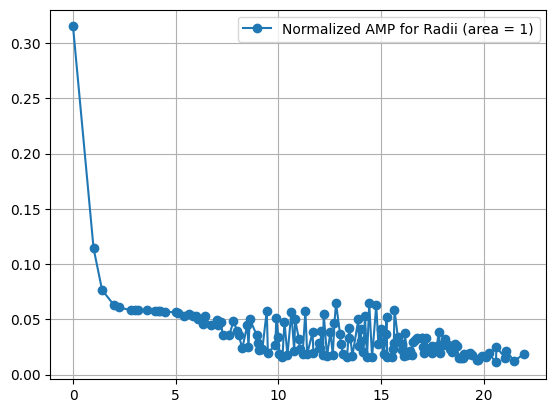

In [40]:

# example data
# radii = ...
# avg_amp = ...

# compute the area using the trapezoidal rule
area = np.trapz(avg_amp, radii)

# normalize so total area = 1
avg_amp_norm = avg_amp / area

# plot normalized curve
plt.plot(radii, avg_amp_norm, marker='o', label='Normalized AMP for Radii (area = 1)')
plt.legend()
plt.grid(True)
plt.show()


In [51]:

# compute cumulative sum of Y values
cumsum_y = np.cumsum(avg_amp_norm)

# normalize to 1 (so total sum = 1)
cumsum_y_norm = cumsum_y / cumsum_y[-1]

# find x where cumulative sum reaches 0.9 (90%)
frac = 0.95
x_90 = np.interp(frac, cumsum_y_norm, radii)

print(f"At x = {x_90:.2f}, cumulative sum of Y = {frac}")


At x = 19.05, cumulative sum of Y = 0.95


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

# radii, avg_amp_norm = ...

# Compute cumulative area
cumulative_area = cumulative_trapezoid(avg_amp_norm, radii, initial=0)

# Find where cumulative area = 0.9
target_area = 0.9
x_90 = np.interp(target_area, cumulative_area, radii)

print(f"At R = {x_90:.2f}, cumulative area = {target_area}")


At R = 16.97, cumulative area = 0.9


C:\Users\bents\AppData\Local\Temp\ipykernel_18760\632106550.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(y, r)


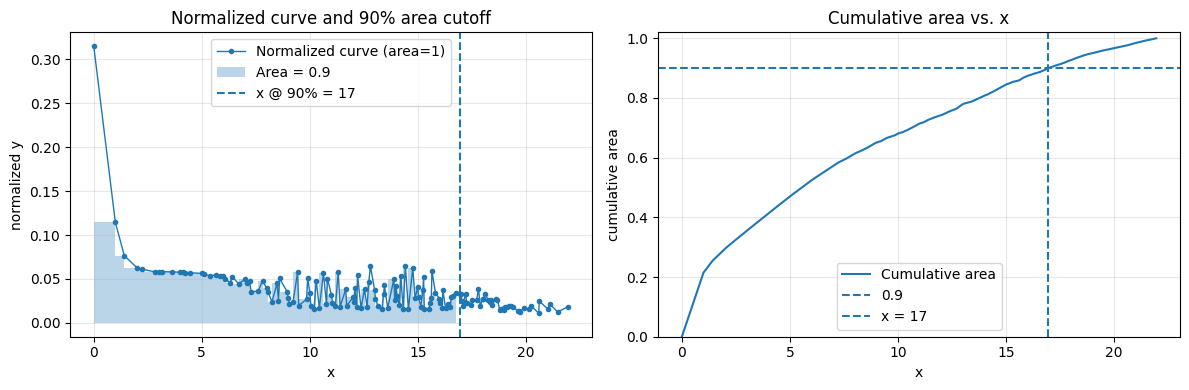

x at 90% area: 16.966010


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

# radii, avg_amp = ...  # your data

# --- 0) Sort by x just in case ---
r = np.asarray(radii)
y = np.asarray(avg_amp)
order = np.argsort(r)
r = r[order]
y = y[order]

# --- 1) Normalize so total area = 1 ---
area = np.trapz(y, r)
y_norm = y / area

# --- 2) Cumulative area & x at 90% ---
cum = cumulative_trapezoid(y_norm, r, initial=0)
x_90 = np.interp(0.9, cum, r)

# --- 3) Plot: curve + shaded area up to x_90 ---
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# (a) normalized curve
axs[0].plot(r, y_norm, marker='o', ms=3, lw=1, label='Normalized curve (area=1)')
axs[0].fill_between(r, 0, y_norm, where=(r <= x_90), alpha=0.3, step='pre', label='Area = 0.9')
axs[0].axvline(x_90, linestyle='--', label=f'x @ 90% = {x_90:.3g}')
axs[0].set_xlabel('x')
axs[0].set_ylabel('normalized y')
axs[0].set_title('Normalized curve and 90% area cutoff')
axs[0].grid(True, alpha=0.3)
axs[0].legend()

# (b) cumulative area
axs[1].plot(r, cum, lw=1.5, label='Cumulative area')
axs[1].axhline(0.9, linestyle='--', label='0.9')
axs[1].axvline(x_90, linestyle='--', label=f'x = {x_90:.3g}')
axs[1].set_xlabel('x')
axs[1].set_ylabel('cumulative area')
axs[1].set_ylim(0, 1.02)
axs[1].set_title('Cumulative area vs. x')
axs[1].grid(True, alpha=0.3)
axs[1].legend()

plt.tight_layout()
plt.show()

print(f"x at 90% area: {x_90:.6f}")
